In [168]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

### Q1 Read the input file and check the data dimension

In [133]:
#Read input file and understand the data
# "default" is my dependent variable
DF=pd.read_csv('german_credit.csv')
DF.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [134]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [135]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [136]:
DF.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

In [17]:
# Lets build a Ensemble model but need to modify the dataset first

Below columns are not important and we can drop these columns from the dataset
credit_history
present_emp_since
installment_as_income_perc
other_debtors
present_res_since
property
other_installment_plans 
credits_this_bank 
people_under_maintenance 
telephone   
foreign_worker  

In [137]:
DF.drop(['credit_history','present_emp_since','installment_as_income_perc','other_debtors','present_res_since','property','other_installment_plans','credits_this_bank','people_under_maintenance','telephone','foreign_worker'],axis=1,inplace=True)

In [138]:
DF.head()

,default,account_check_status,duration_in_month,purpose,credit_amount,savings,personal_status_sex,age,housing,job
0,0,< 0 DM,6,domestic appliances,1169,unknown/ no savings account,male : single,67,own,skilled employee / official
1,1,0 <= ... < 200 DM,48,domestic appliances,5951,... < 100 DM,female : divorced/separated/married,22,own,skilled employee / official
2,0,no checking account,12,(vacation - does not exist?),2096,... < 100 DM,male : single,49,own,unskilled - resident
3,0,< 0 DM,42,radio/television,7882,... < 100 DM,male : single,45,for free,skilled employee / official
4,1,< 0 DM,24,car (new),4870,... < 100 DM,male : single,53,for free,skilled employee / official


In [139]:
DF.isnull().sum()

default                 0
account_check_status    0
duration_in_month       0
purpose                 0
credit_amount           0
savings                 0
personal_status_sex     0
age                     0
housing                 0
job                     0
dtype: int64

In [140]:
DF['account_check_status'].value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [141]:
DF['account_check_status'] = DF['account_check_status'].replace({'no checking account': 'NA', 
                                                                 '< 0 DM': 'little', 
                                                                 '0 <= ... < 200 DM': 'moderate',
                                                                 '>= 200 DM / salary assignments for at least 1 year':'rich'})  

In [142]:
DF['account_check_status'].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: account_check_status, dtype: int64

In [143]:
DF['savings'].value_counts()

... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: savings, dtype: int64

In [144]:
DF['savings'] = DF['savings'].replace({'unknown/ no savings account': 'NA', 
                                       '... < 100 DM': 'little', 
                                       '100 <= ... < 500 DM': 'moderate',
                                       '500 <= ... < 1000 DM ':'quite rich',
                                       '.. >= 1000 DM ':'rich'})  

In [145]:
DF['savings'].value_counts()

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: savings, dtype: int64

In [146]:
DF['purpose'].value_counts()

domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
repairs                          12
furniture/equipment              12
retraining                        9
Name: purpose, dtype: int64

In [147]:
DF['purpose'] = DF['purpose'].replace({'car (new)': 'car', 
                                       'car (used)': 'car', 
                                       })  

In [148]:
DF['purpose'].value_counts()

car                             337
domestic appliances             280
radio/television                181
business                         97
(vacation - does not exist?)     50
education                        22
repairs                          12
furniture/equipment              12
retraining                        9
Name: purpose, dtype: int64

In [149]:
DF['personal_status_sex'].value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: personal_status_sex, dtype: int64

In [150]:
DF['personal_status_sex'] = DF['personal_status_sex'].replace({'male : single': 'male', 
                                       'female : divorced/separated/married': 'female',
                                       'male : married/widowed': 'male',
                                       'male : divorced/separated' : 'male'
                                       })  

In [151]:
DF['personal_status_sex'].value_counts()

male      690
female    310
Name: personal_status_sex, dtype: int64

In [152]:
DF.rename(columns={"personal_status_sex": "sex"},inplace=True)     
DF.head()

,default,account_check_status,duration_in_month,purpose,credit_amount,savings,sex,age,housing,job
0,0,little,6,domestic appliances,1169,NA,male,67,own,skilled employee / official
1,1,moderate,48,domestic appliances,5951,little,female,22,own,skilled employee / official
2,0,NA,12,(vacation - does not exist?),2096,little,male,49,own,unskilled - resident
3,0,little,42,radio/television,7882,little,male,45,for free,skilled employee / official
4,1,little,24,car,4870,little,male,53,for free,skilled employee / official


In [153]:
DF['job'].value_counts()

skilled employee / official                                      630
unskilled - resident                                             200
management/ self-employed/ highly qualified employee/ officer    148
unemployed/ unskilled - non-resident                              22
Name: job, dtype: int64

In [154]:
DF['housing'].value_counts()

own         713
rent        179
for free    108
Name: housing, dtype: int64

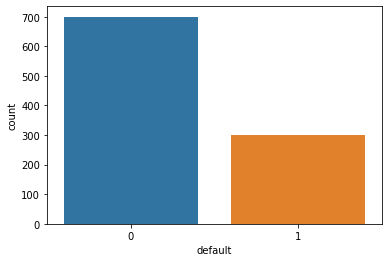

In [155]:
sns.countplot(DF['default'],data=DF)

In [156]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
default                 1000 non-null int64
account_check_status    1000 non-null object
duration_in_month       1000 non-null int64
purpose                 1000 non-null object
credit_amount           1000 non-null int64
savings                 1000 non-null object
sex                     1000 non-null object
age                     1000 non-null int64
housing                 1000 non-null object
job                     1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [157]:
interval = (18, 25, 35, 60, 120)
age_cats = ['Student', 'Young', 'Adult', 'Senior']
DF["Age_cat"] = pd.cut(DF.age, interval, labels=age_cats)

In [158]:
DF['Age_cat'].value_counts()

Young      398
Adult      367
Student    190
Senior      45
Name: Age_cat, dtype: int64

In [159]:
DF.drop('age',axis=1,inplace=True)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [160]:
# Print Shape of model data
DF.shape

(1000, 10)

In [161]:
DF = pd.get_dummies(DF, columns=['account_check_status','purpose','savings','sex','housing','job','Age_cat'])

In [170]:
DF.head()

,default,duration_in_month,credit_amount,account_check_status_NA,account_check_status_little,account_check_status_moderate,account_check_status_rich,purpose_(vacation - does not exist?),purpose_business,purpose_car,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,Age_cat_Student,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,0,6,1169,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,1,48,5951,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0,12,2096,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,42,7882,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,24,4870,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


### Check for highly correlated variables but don't required any treatment for this use case

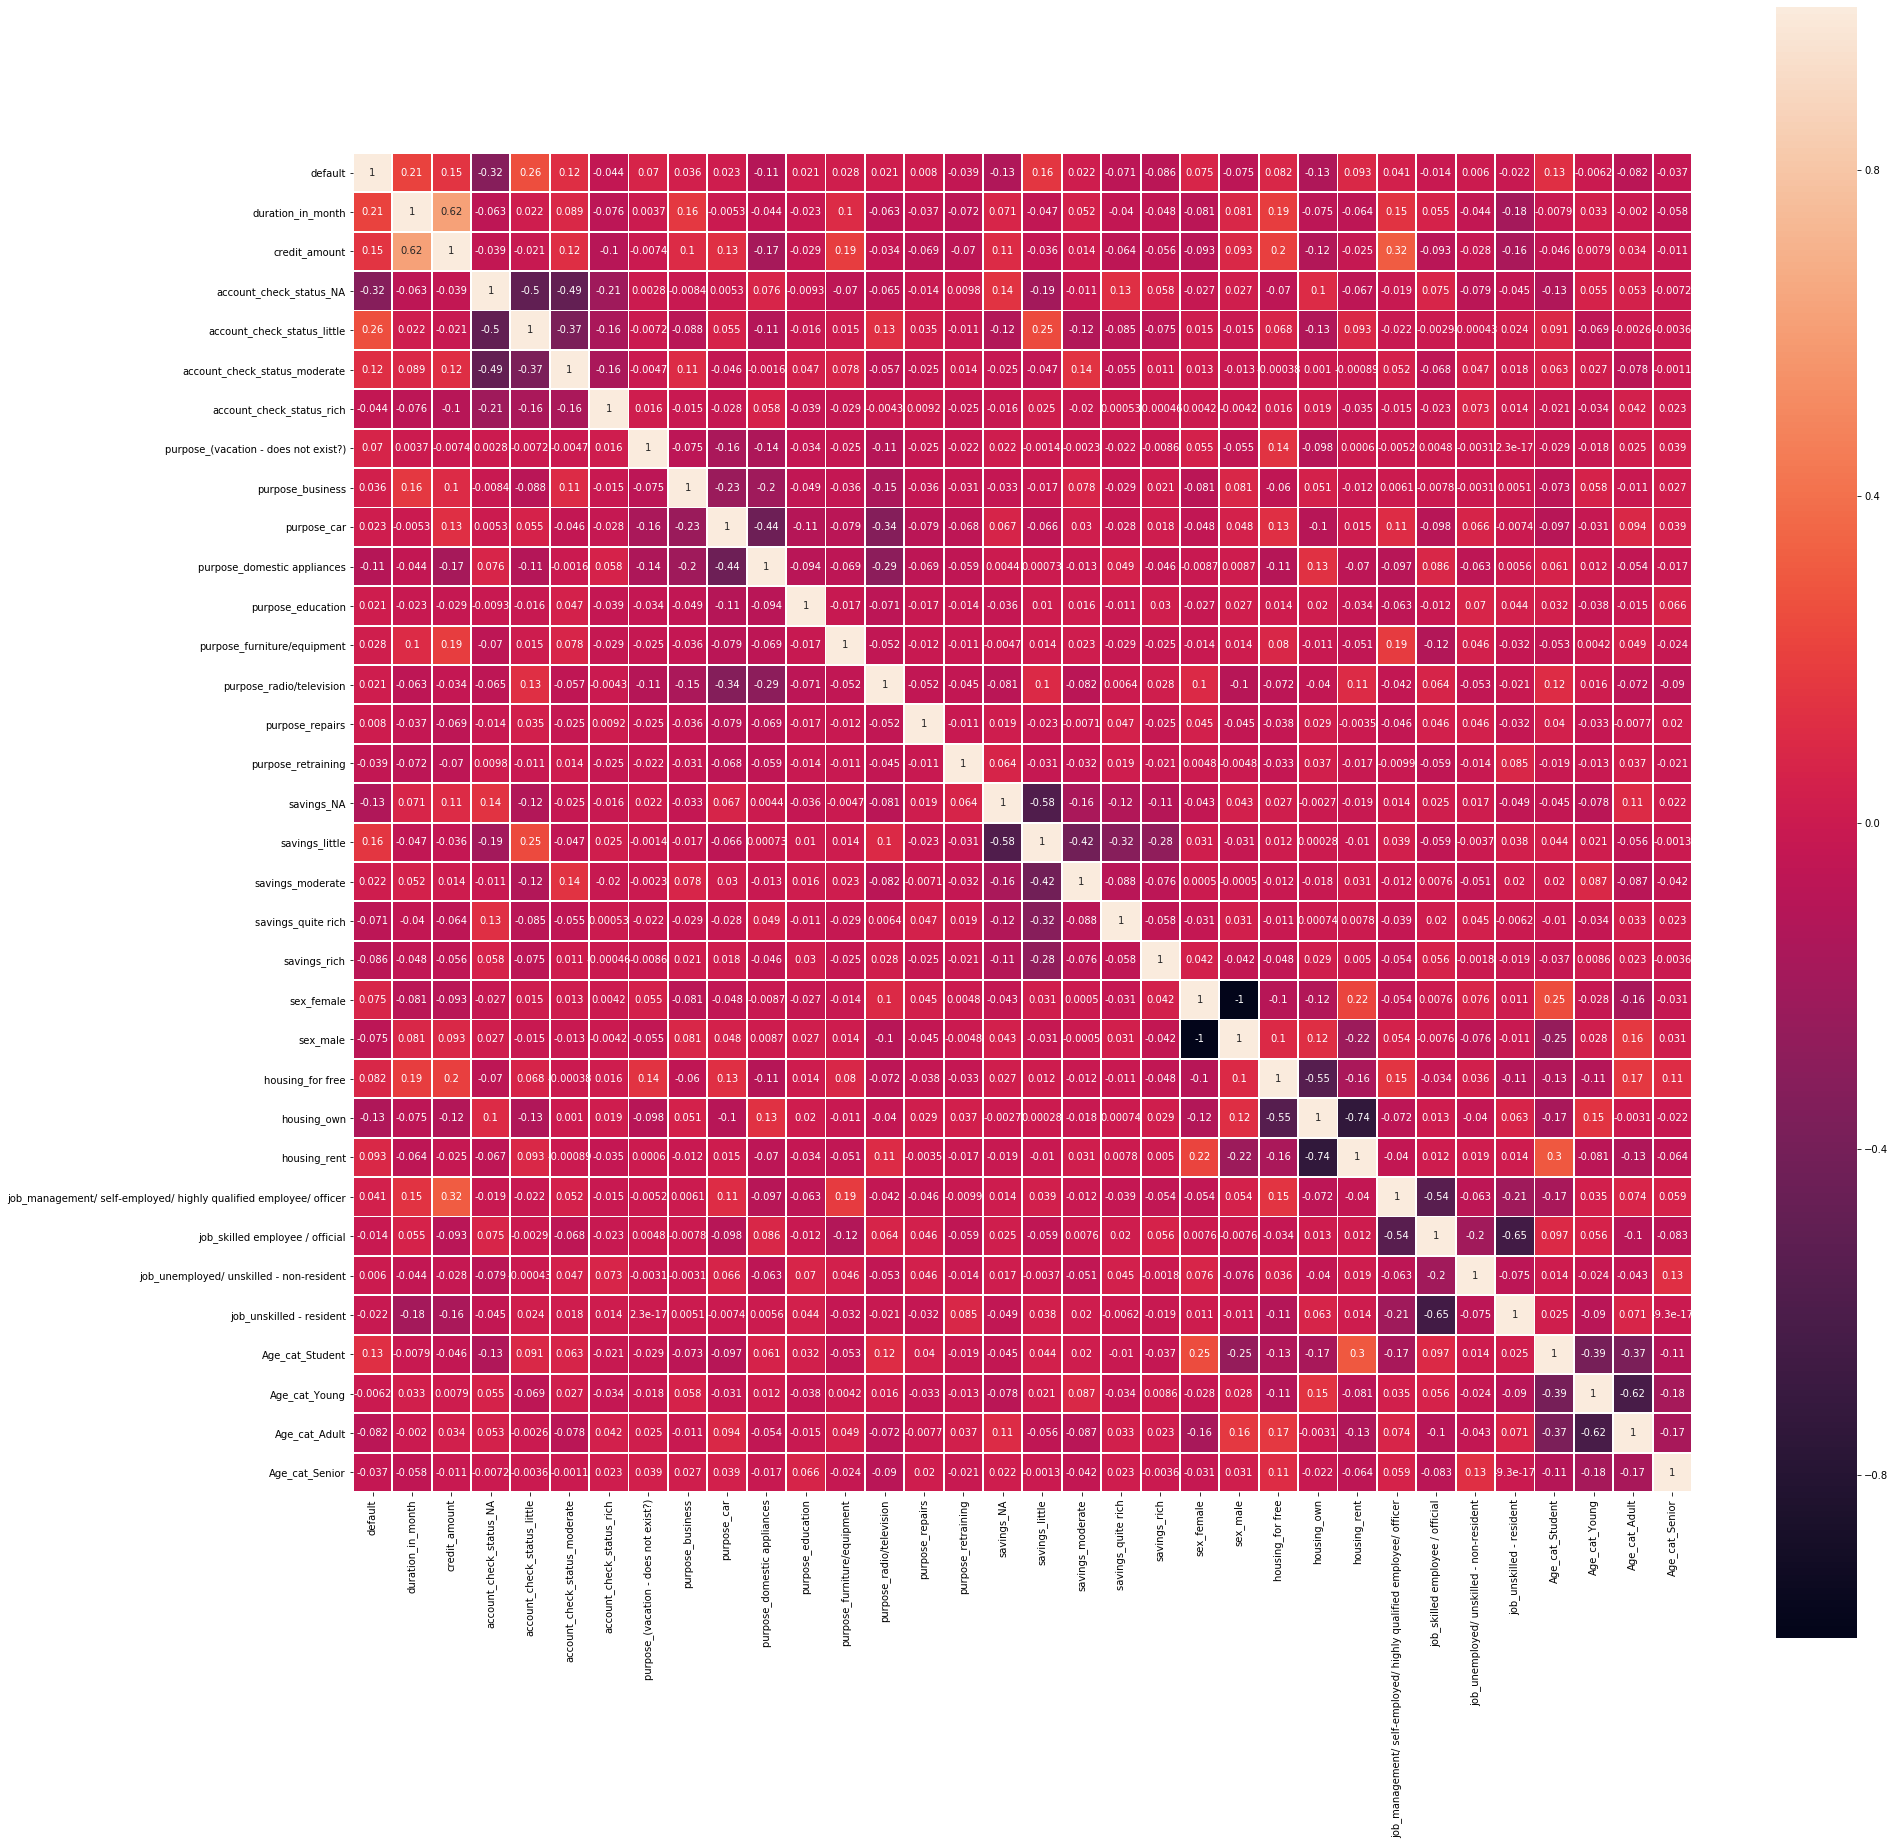

In [166]:
plt.figure(figsize=(30,30))
sns.heatmap(DF.astype(float).corr(),linewidths=0.9,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

High correlated features with target are - 
account_check_status little(0.26), 
duration in month(0.21), 
credit amount(0.15), 
savings little (0.16)
age_cat student (0.13)
account_check_status moderate(0.12)
purpose domestic appliances (0.11)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [171]:
X=DF.drop('default',axis=1)
Y=DF['default']
X.shape,Y.shape

((1000, 33), (1000,))

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

### Q4 Build Random Forest Model( 2 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [175]:
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, train_labels)
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , test_labels)

0.74

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, test_pred)
print(confusion_matrix)

[[183  31]
 [ 47  39]]


### Q6 Show the list of the features importance( 1 Marks)

In [177]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                         Imp
duration_in_month                                   0.156263
credit_amount                                       0.225449
account_check_status_NA                             0.054554
account_check_status_little                         0.038342
account_check_status_moderate                       0.025957
account_check_status_rich                           0.012699
purpose_(vacation - does not exist?)                0.010194
purpose_business                                    0.022908
purpose_car                                         0.029740
purpose_domestic appliances                         0.027680
purpose_education                                   0.008393
purpose_furniture/equipment                         0.003130
purpose_radio/television                            0.023448
purpose_repairs                                     0.004326
purpose_retraining                                  0.001850
savings_NA              

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [178]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [179]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

RandomForest: 0.386556 (0.006561)


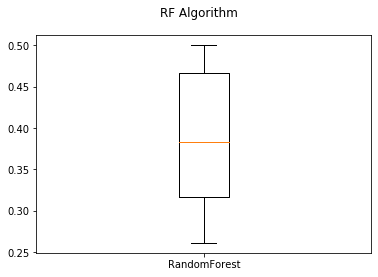

In [185]:
from sklearn import model_selection
models = []
models.append(('RandomForest', rfcl))
results = []
names = []
scoring = 'recall'
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, train_labels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
    print(msg)
    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('RF Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#Calculate Mean score

In [186]:
cv_results

array([0.47058824, 0.26086957, 0.5       , 0.38095238, 0.31034483,
       0.47619048, 0.33333333, 0.29411765, 0.45454545, 0.38461538])

In [189]:
np.mean(cv_results)

0.3865557304793569

In [0]:
# Calculate score standard deviation using std()

In [190]:
np.std(cv_results)

0.08099737867379865

# Q8 Build Ada boosting model, check the accuracy, and print confusion matrix ( 1 Marks)

In [192]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [193]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = abcl.fit(X_train, train_labels)
    
test_pred = abcl.predict(X_test)
abcl.score(X_test , test_labels)

0.7233333333333334

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, test_pred)
print(confusion_matrix)

[[171  43]
 [ 40  46]]


# Q9. Build Gradient boosting model, check the accuracy, and print confusion matrix ( 1 Marks)
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train, train_labels)
test_pred = gbcl.predict(X_test)
gbcl.score(X_test , test_labels)

0.7366666666666667

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, test_pred)
print(confusion_matrix)

[[184  30]
 [ 49  37]]


In [205]:
TN=184
FP=30
FN=49
TP=37
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
print('Recall = ',Recall)
print('Precision = ',Precision)

Recall =  0.43023255813953487
Precision =  0.5522388059701493


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [198]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [202]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, train_labels)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, test_labels)
    accuracy.append(acc)

In [203]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7310000000000001
Standard deviation:  0.011742609969205694
